In [3]:
import torch
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.io import loadmat
from einops import rearrange

(4, 25, 92, 96, 20)


/tmp/ipykernel_59401/3222894249.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  img=img.astype(np.float32)


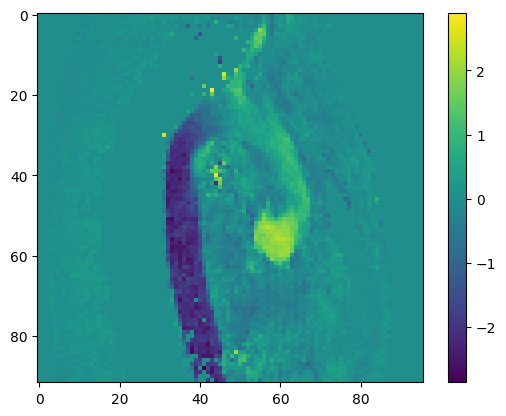

(4, 25, 88, 96, 19)


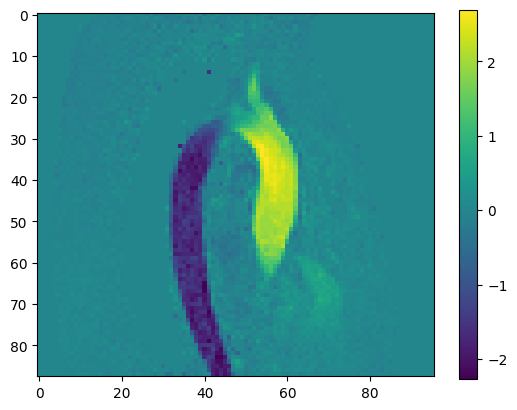

(4, 25, 100, 96, 19)


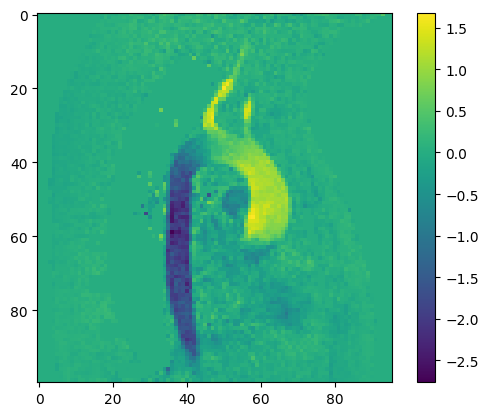

(4, 25, 100, 96, 23)


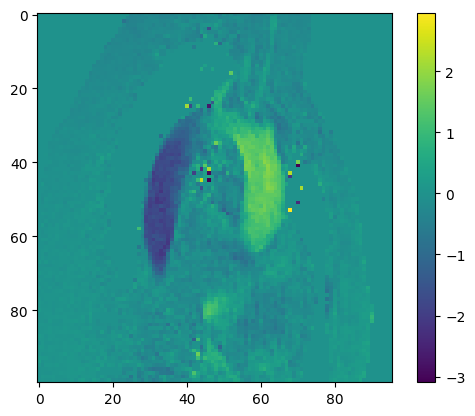

(4, 25, 92, 96, 20)


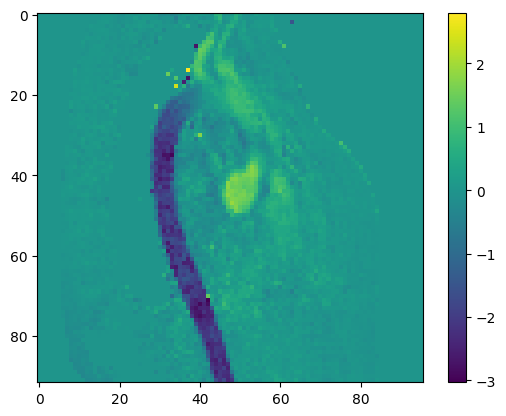

(4, 25, 112, 112, 19)


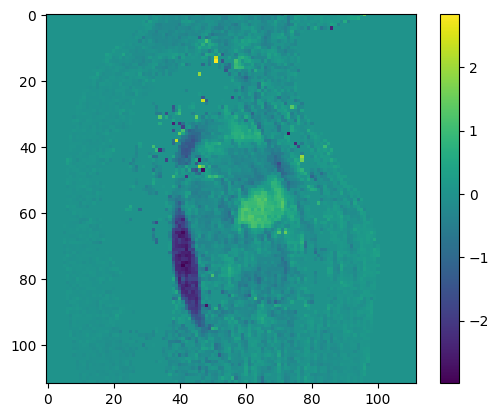

(4, 25, 112, 112, 19)


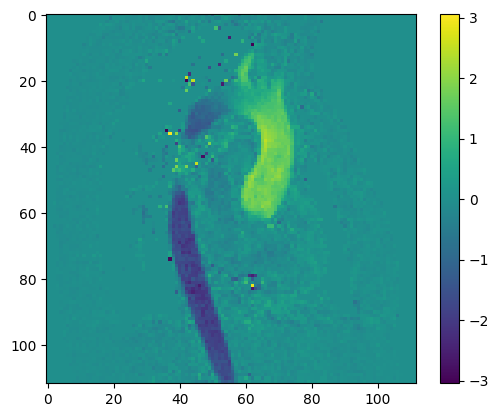

In [8]:
for i in range(1,8):
    data=loadmat(os.path.join("data","imgt_volN{}.mat".format(i)))
    img=data["img"]
    msk=data["mask"]
    img=rearrange(img,"x y z p c -> c p x y z")
    print(img.shape)
    img[1:]=np.angle(img[1:]*img[0].conj())
    img[0] = np.abs(img[0])
    img=img.astype(np.float32)
    img[1:,img[0]<30]=0
    plt.imshow(img[1,3,:,:,10])
    plt.colorbar()
    plt.show()
